# Template Matching using Fast Normalized Cross Correlation

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import sys,os
ia898path = os.path.abspath('/home/lotufo/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_12/')
if path not in sys.path:
    sys.path.append(path)
import conv_media as convm
path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_10/')
if path not in sys.path:
    sys.path.append(path)
import pconvfft as conv

In [2]:
def tm_fncc(f, t):
    H,W = t.shape
    Numerator = conv.pconvfft(f,t[::-1,::-1]-np.mean(t))
    Denominator = np.sqrt( (convm.conv_media(f.astype(float)**2,t.shape)*(H*W)) - (1/(t.shape[0]*t.shape[1]))*
                          (convm.conv_media(f,t.shape)*(H*W))**2)
    gamma = Numerator/Denominator
    (r,c) = np.unravel_index(np.argmax(gamma),gamma.shape)
    maxGamma = gamma[r,c]
    return ((r,c),maxGamma, gamma)

In [3]:
testing = (__name__ == '__main__')

if testing:
    import sys,os
    ! jupyter nbconvert --to 'python' tm_fncc

    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_12/')
    if path not in sys.path:
        sys.path.append(path)
    import tm_fncc as tm

[NbConvertApp] Converting notebook tm_fncc.ipynb to python
[NbConvertApp] Writing 3669 bytes to tm_fncc.py


## Teste numérico

In [4]:
if testing:
    f = np.ones((5,5))
    f[1:4,1:4]=np.ones((3,3))*5
    f[2,2]=10

    t = np.array([[10,5,1],
                 [5,5,1],
                 [1,1,1]])
    print('f:\n',f)
    print('t:\n',t)
    
    g = tm_fncc(f,t)
    print('pos: ',g[0])
    print('max gamma:',g[1])
    print('gamma mat:\n',g[2])


f:
 [[  1.   1.   1.   1.   1.]
 [  1.   5.   5.   5.   1.]
 [  1.   5.  10.   5.   1.]
 [  1.   5.   5.   5.   1.]
 [  1.   1.   1.   1.   1.]]
t:
 [[10  5  1]
 [ 5  5  1]
 [ 1  1  1]]
pos:  (4, 4)
max gamma: 8.94427191
gamma mat:
 [[ 7.07106781 -2.47487373 -0.53452248  4.24264069  6.68153105]
 [-2.47487373 -2.47487373 -3.74165739 -4.94974747 -3.74165739]
 [-0.53452248 -3.74165739 -3.68951216 -4.33942302 -1.90065778]
 [ 4.24264069 -4.94974747 -4.33942302  1.76776695  4.42053373]
 [ 6.68153105 -3.74165739 -1.90065778  4.42053373  8.94427191]]


## Teste com imagens

""
Imagem original
""
Template
""
Gamma

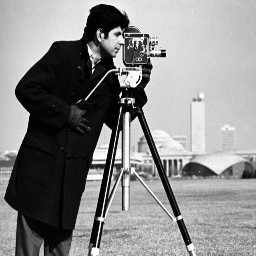
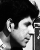
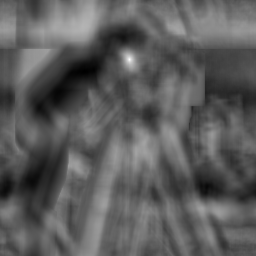

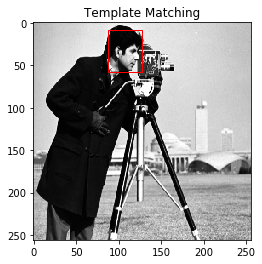

In [5]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    t = f[10:60,90:130]
    g = tm_fncc(f,t)
    x,y = g[0]

    nb = ia.nbshow(3)
    nb.nbshow(f, 'Imagem original')
    nb.nbshow(t, 'Template' )
    nb.nbshow(ia.normalize(g[2]), 'Gamma' )
    nb.nbshow()    
    
    plt.figure(2)
    fig,ax = plt.subplots(1)
    plt.title('Template Matching')
    ax.imshow(f,cmap='gray')
    rect = patches.Rectangle((y-t.shape[1]-1,x-t.shape[0]-1),t.shape[1],t.shape[0],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()

""
f1
""
f2
""
t1
""
t2

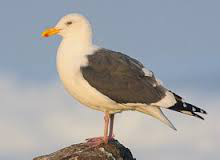
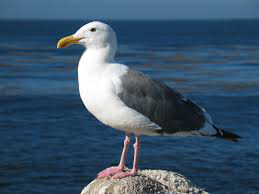
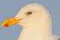
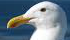

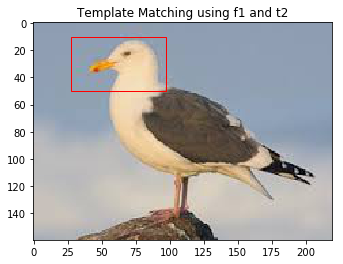

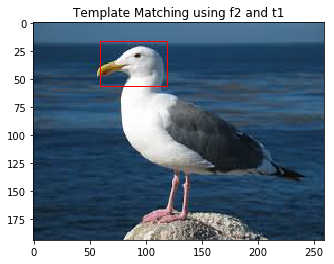

In [6]:
if testing:
    from skimage import color
    f1 = mpimg.imread('/home/d191122/data/gull3.jpg')
    f2 = mpimg.imread('/home/d191122/data/gull2.jpg')
    #f1 = ia.normalize(color.rgb2gray(f1))
    #f2 = ia.normalize(color.rgb2gray(f2))
    t1 = f1[10:50,40:100,:]
    t2 = f2[20:60,50:120,:]
    
    nb = ia.nbshow(4)
    nb.nbshow(f1, 'f1')
    nb.nbshow(f2, 'f2' )
    nb.nbshow(t1, 't1' )
    nb.nbshow(t2, 't2' )
    nb.nbshow()  
    
    
    g1 = tm_fncc(ia.normalize(color.rgb2gray(f1)),ia.normalize(color.rgb2gray(t2)))
    g2 = tm_fncc(ia.normalize(color.rgb2gray(f2)),ia.normalize(color.rgb2gray(t1)))
    
    x1,y1 = g1[0]
    x2,y2 = g2[0]
    
    plt.figure(1)
    fig,ax = plt.subplots(1)
    plt.title('Template Matching using f1 and t2')
    ax.imshow(f1,cmap='gray')
    rect = patches.Rectangle((y1-t2.shape[1]-1,x1-t2.shape[0]-1),t2.shape[1],t2.shape[0],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()
    
    plt.figure(2)
    fig,ax = plt.subplots(1)
    plt.title('Template Matching using f2 and t1')
    ax.imshow(f2,cmap='gray')
    rect = patches.Rectangle((y2-t1.shape[1]-1,x2-t1.shape[0]-1),t1.shape[1],t1.shape[0],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()
    